In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import joblib

In [46]:
df = pd.read_csv('./Used_Bikes.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [47]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [48]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

np.int64(0)

In [49]:
owner = {'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth Owner Or More':3}
df['owner'] = df['owner'].map(owner)
df['owner']

0       0
1       0
2       0
3       0
4       0
       ..
9362    0
9369    0
9370    0
9371    0
9372    0
Name: owner, Length: 7324, dtype: int64

In [50]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,0,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,0,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,0,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,0,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,0,3.0,150.0,Yamaha


In [51]:
le_city = LabelEncoder()
df['city']=le_city.fit_transform(df['city'])
joblib.dump(le_city,'./Encoder_city.jlb')
df['city']

0         6
1       118
2       118
3        44
4        44
       ... 
9362    118
9369     44
9370    211
9371    185
9372    185
Name: city, Length: 7324, dtype: int64

In [52]:
le_brand = LabelEncoder()
df['brand'] = le_brand.fit_transform(df['brand'])
joblib.dump(le_brand,'./Encoder_brand.jlb')
df['brand']

0       19
1       17
2       20
3       19
4       21
        ..
9362     5
9369     1
9370     4
9371     1
9372     1
Name: brand, Length: 7324, dtype: int64

In [53]:
le_bike_name = LabelEncoder()
df['bike_name'] = le_bike_name.fit_transform(df['bike_name'])
joblib.dump(le_bike_name,'./Encoder_bike_name.jlb')
df['bike_name']

0       401
1       295
2       411
3       375
4       426
       ... 
9362    141
9369      9
9370    110
9371     44
9372     15
Name: bike_name, Length: 7324, dtype: int64

In [54]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   7324 non-null   int64  
 1   price       7324 non-null   float64
 2   city        7324 non-null   int64  
 3   kms_driven  7324 non-null   float64
 4   owner       7324 non-null   int64  
 5   age         7324 non-null   float64
 6   power       7324 non-null   float64
 7   brand       7324 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 515.0 KB


,bike_name,price,city,kms_driven,owner,age,power,brand
0,401,35000.0,6,17654.0,0,3.0,110.0,19
1,295,119900.0,118,11000.0,0,4.0,350.0,17
2,411,600000.0,118,110.0,0,8.0,675.0,20
3,375,65000.0,44,16329.0,0,4.0,180.0,19
4,426,80000.0,44,10000.0,0,3.0,150.0,21


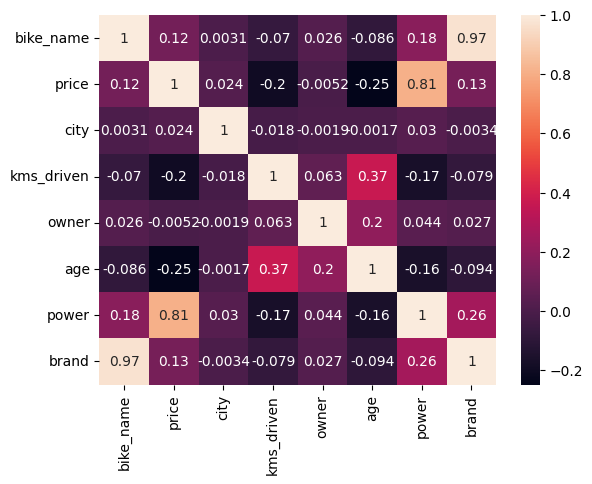

In [55]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### splitting the data into input and output features

In [44]:
x = df.drop(columns='price')
y = df['price']
x.shape, y.shape

((7324, 7), (7324,))

In [54]:
x.describe()

,bike_name,city,kms_driven,owner,age,power,brand
count,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000
mean,208.325096,174.971873,23910.496587,0.107318,6.656472,228.133397,9.326188
std,134.796887,103.471452,27317.594631,0.356299,3.605299,158.324219,7.520464
min,0.000000,0.000000,1.000000,0.000000,1.000000,100.000000,0.000000
25%,74.000000,118.000000,10155.750000,0.000000,4.000000,125.000000,1.000000
50%,205.000000,156.000000,19000.000000,0.000000,6.000000,160.000000,6.000000
75%,313.000000,258.000000,30112.000000,0.000000,8.000000,350.000000,17.000000
max,470.000000,442.000000,750000.000000,3.000000,63.000000,1800.000000,22.000000


In [55]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)
joblib.dump(ss,'./scaler.jlb')
x.describe()

,bike_name,city,kms_driven,owner,age,power,brand
count,7.324000e+03,7.324000e+03,7.324000e+03,7.324000e+03,7.324000e+03,7.324000e+03,7.324000e+03
mean,8.731410e-17,2.328376e-17,4.656752e-17,-4.462721e-17,1.164188e-16,-6.209003e-17,-7.373191e-17
std,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00
min,-1.545580e+00,-1.691131e+00,-8.753014e-01,-3.012237e-01,-1.569040e+00,-8.093654e-01,-1.240193e+00
25%,-9.965680e-01,-5.506423e-01,-5.035467e-01,-3.012237e-01,-7.368746e-01,-6.514508e-01,-1.107213e+00
50%,-2.466913e-02,-1.833662e-01,-1.797681e-01,-3.012237e-01,-1.820977e-01,-4.303703e-01,-4.423151e-01
75%,7.765910e-01,8.024802e-01,2.270305e-01,-3.012237e-01,3.726792e-01,7.697807e-01,1.020460e+00
max,1.941386e+00,2.580870e+00,2.658137e+01,8.119244e+00,1.562904e+01,9.928828e+00,1.685358e+00


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.7008252612455017, 0.7557554664042285)

In [58]:
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)
svr.score(x_train, y_train), svr.score(x_test, y_test)

(0.004439069063495671, 0.0017003835169314696)

In [59]:
knn = KNeighborsRegressor(n_neighbors=26)
knn.fit(x_train, y_train)
knn.score(x_train, y_train), knn.score(x_test, y_test)

(0.8299909162415622, 0.8268995578665245)

In [60]:
dtr = DecisionTreeRegressor(max_depth=2)
dtr.fit(x_train, y_train)
dtr.score(x_train, y_train), dtr.score(x_test, y_test)

(0.789302141636579, 0.7677323310539339)

In [61]:
from sklearn.ensemble import VotingRegressor, RandomForestRegressor

## using voting regressor 

In [62]:
estimators = [('lr',LinearRegression()),('knn',KNeighborsRegressor(n_neighbors=26)),('dtr',DecisionTreeRegressor(max_depth=2))]
vr = VotingRegressor(estimators=estimators)
vr.fit(x_train, y_train)

,estimators,"[('lr', ...), ('knn', ...), ...]"
,weights,None
,n_jobs,None
,verbose,False
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
,n_neighbors,26
,weights,'uniform'


In [63]:
vr.score(x_train, y_train), vr.score(x_test, y_test)

(0.823374025409454, 0.8264395016986565)

In [92]:
joblib.dump(vr,'./voting_regressor.jlb')

['./voting_regressor.jlb']

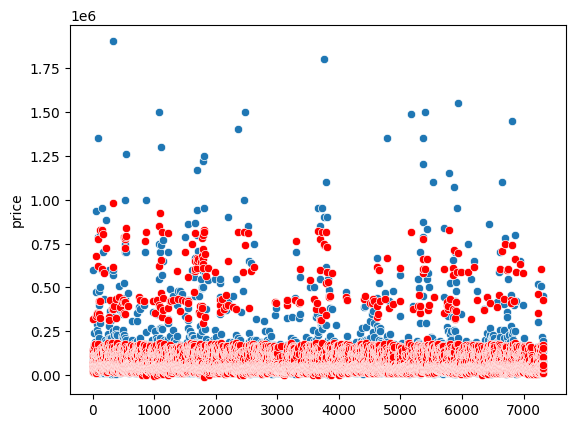

In [64]:
sns.scatterplot(x=[i for i in range(0,7324)],y=y)
sns.scatterplot(x=[i for i in range(0,7324)],y=vr.predict(x), color='r')
plt.show()

In [72]:
print(f'predicted:{ vr.predict(ss.transform([[401,6,17654.0,0,3.0,110.0,19]]))} actual: {35000}')
print(f'predicted:{ vr.predict(ss.transform([[295,118,11000.0,0,4.0,350.0,17]]))} actual: {119900.0}')

predicted:[48221.15271003] actual: 35000
predicted:[123150.91217079] actual: 119900.0


e:\Windows 10\Python Files\Projects\py_venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
e:\Windows 10\Python Files\Projects\py_venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\Windows 10\Python Files\Projects\py_venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
e:\Windows 10\Python Files\Projects\py_venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
e:\Windows 10\Python Files\Projects\py_venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature

## using random forest

In [88]:
rfr = RandomForestRegressor(max_depth=2)
rfr.fit(x_train, y_train)
rfr.score(x_train, y_train), rfr.score(x_test, y_test)

(0.8000893391585394, 0.7952679094613688)

In [89]:
joblib.dump(rfr,'./Random_forest.jlb')

['./Random_forest.jlb']

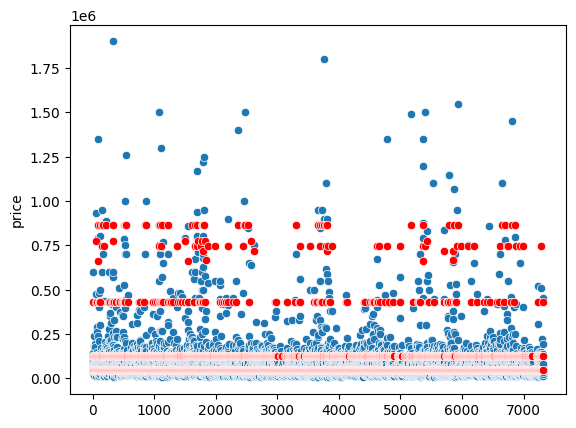

In [90]:
sns.scatterplot(x=[i for i in range(0,7324)],y=y)
sns.scatterplot(x=[i for i in range(0,7324)],y=rfr.predict(x),color='r')
plt.show()

In [91]:
print(f'predicted:{ rfr.predict(ss.transform([[401,6,17654.0,0,3.0,110.0,19]]))} actual: {35000}')
print(f'predicted:{ rfr.predict(ss.transform([[295,118,11000.0,0,4.0,350.0,17]]))} actual: {119900.0}')

predicted:[46491.9179413] actual: 35000
predicted:[124811.9215091] actual: 119900.0


e:\Windows 10\Python Files\Projects\py_venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
e:\Windows 10\Python Files\Projects\py_venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
e:\Windows 10\Python Files\Projects\py_venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
e:\Windows 10\Python Files\Projects\py_venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
